In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [3]:
with pd.HDFStore("./data/train.h5", "r") as train:
    df = train.get("train")

Notes:
    1. Features generally display weak linear relationships with target variable.

In [4]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [6]:
corr = df.corr()

In [7]:
# Correlations show weak linear relationship between y and features.
sorted_abs_corr = np.abs(corr.y).sort_values()
sorted_abs_corr.tail(20)

technical_14      0.003801
fundamental_55    0.003846
technical_29      0.003924
fundamental_62    0.004136
technical_6       0.004293
technical_0       0.004328
technical_43      0.004971
fundamental_18    0.005123
technical_2       0.005381
technical_11      0.005447
technical_36      0.005902
technical_35      0.006009
fundamental_53    0.006009
fundamental_51    0.006013
technical_19      0.007647
technical_27      0.008092
fundamental_11    0.008151
technical_30      0.014272
technical_20      0.016534
y                 1.000000
Name: y, dtype: float64

### Take top 4 and run univariate analysis

In [8]:
print("% of Nans: {}".format(df.technical_20.isnull().sum()/df.id.count()))

% of Nans: 0.0027847337668258946


In [9]:
# Use forward fill naively as a first pass
df.technical_20.fillna(method='ffill',inplace=True)

In [10]:
print("% of Nans: {}".format(df.technical_20.isnull().sum()/df.id.count()))

% of Nans: 0.0


Assess technical_20

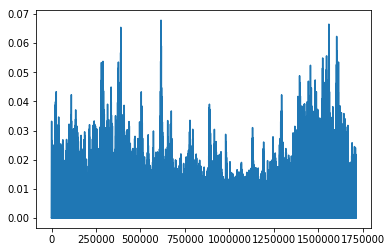

In [11]:
df.technical_20.plot()


In [12]:
df.technical_20.describe()

count    1.710756e+06
mean     1.453616e-03
std      2.891707e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.197929e-03
max      6.784815e-02
Name: technical_20, dtype: float64

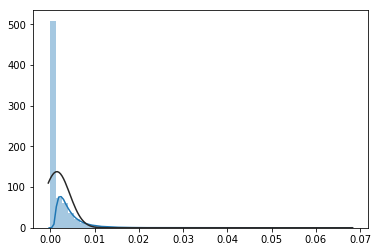

In [13]:
from scipy.stats import norm
sns.distplot(df[['technical_20']], fit=norm)

Assess technical_30

In [14]:
print("% of Nans: {}".format(df.technical_30.isnull().sum()/df.id.count()))
# Use forward fill naively as a first pass
df.technical_30.fillna(method='ffill',inplace=True)
print("% of Nans: {}".format(df.technical_30.isnull().sum()/df.id.count()))

% of Nans: 0.0027847337668258946
% of Nans: 0.0


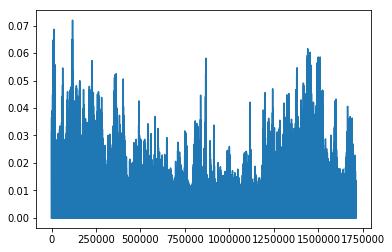

In [15]:
df.technical_30.plot()

In [16]:
df.technical_30.describe()

count    1.710756e+06
mean     1.246206e-03
std      2.822771e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.465757e-03
max      7.195023e-02
Name: technical_30, dtype: float64

Assess fundamental_11

In [17]:
print("% of Nans: {}".format(df.fundamental_11.isnull().sum()/df.id.count()))
# Use forward fill naively as a first pass
df.fundamental_11.fillna(method='ffill',inplace=True)
print("% of Nans: {}".format(df.fundamental_11.isnull().sum()/df.id.count()))

% of Nans: 0.21560058827793094
% of Nans: 0.0


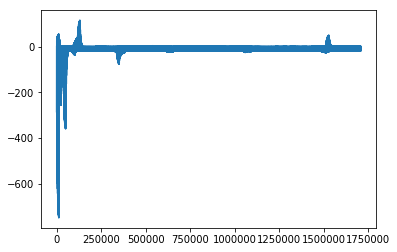

In [18]:
df.fundamental_11.plot()

In [19]:
df.fundamental_11.describe() # ALL negative values

count    1.710756e+06
mean    -2.338738e-01
std      2.831372e+00
min     -7.505370e+02
25%     -2.515637e-01
50%     -2.277339e-02
75%      1.412625e-01
max      1.167478e+02
Name: fundamental_11, dtype: float64

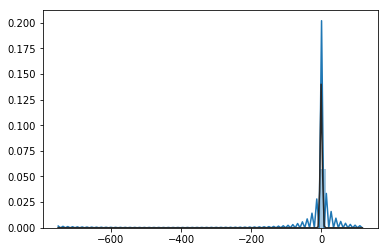

In [20]:
from scipy.stats import norm
sns.distplot(df[['fundamental_11']], fit=norm)

In [21]:
# Technical_37 has consecutive Nans

print("% of Nans: {}".format(df.technical_27.isnull().sum()/df.id.count()))
# Use forward fill naively as a first pass
df.technical_37.fillna(method='ffill',inplace=True)
print("% of Nans: {}".format(df.technical_37.isnull().sum()/df.id.count()))

% of Nans: 0.0014145792854153368
% of Nans: 0.009196518965884089


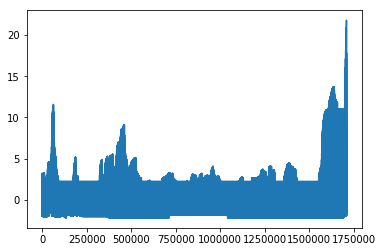

In [22]:
df.technical_27.plot()

In [23]:
df.technical_27.interpolate(inplace=True)
print("% of Nans: {}".format(df.technical_37.isnull().sum()/df.id.count()))

% of Nans: 0.009196518965884089


In [24]:
# Correlation between top 10

In [25]:
col = ['technical_11',
       'technical_36',      
       'technical_35',
       'fundamental_53',
       'fundamental_51',    
       'technical_19',      
       'technical_27',      
       'fundamental_11',    
       'technical_30',     
       'technical_20'
      ]

df_high_corr = df[col].corr()

In [26]:
# Normality test
from scipy import stats as stats
for c in col:
    _, p_value = stats.jarque_bera(df[c])
    print("{}: p-value: {}".format(c, p_value))
    

technical_11: p-value: nan
technical_36: p-value: nan
technical_35: p-value: nan
fundamental_53: p-value: nan
fundamental_51: p-value: nan
technical_19: p-value: nan
technical_27: p-value: 0.0
fundamental_11: p-value: 0.0
technical_30: p-value: 0.0
technical_20: p-value: 0.0


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


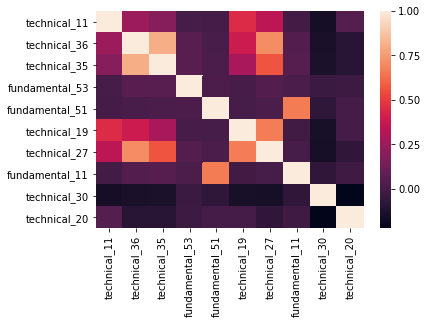

In [27]:
df_high_corr = df[col].corr()
sns.heatmap(df_high_corr)

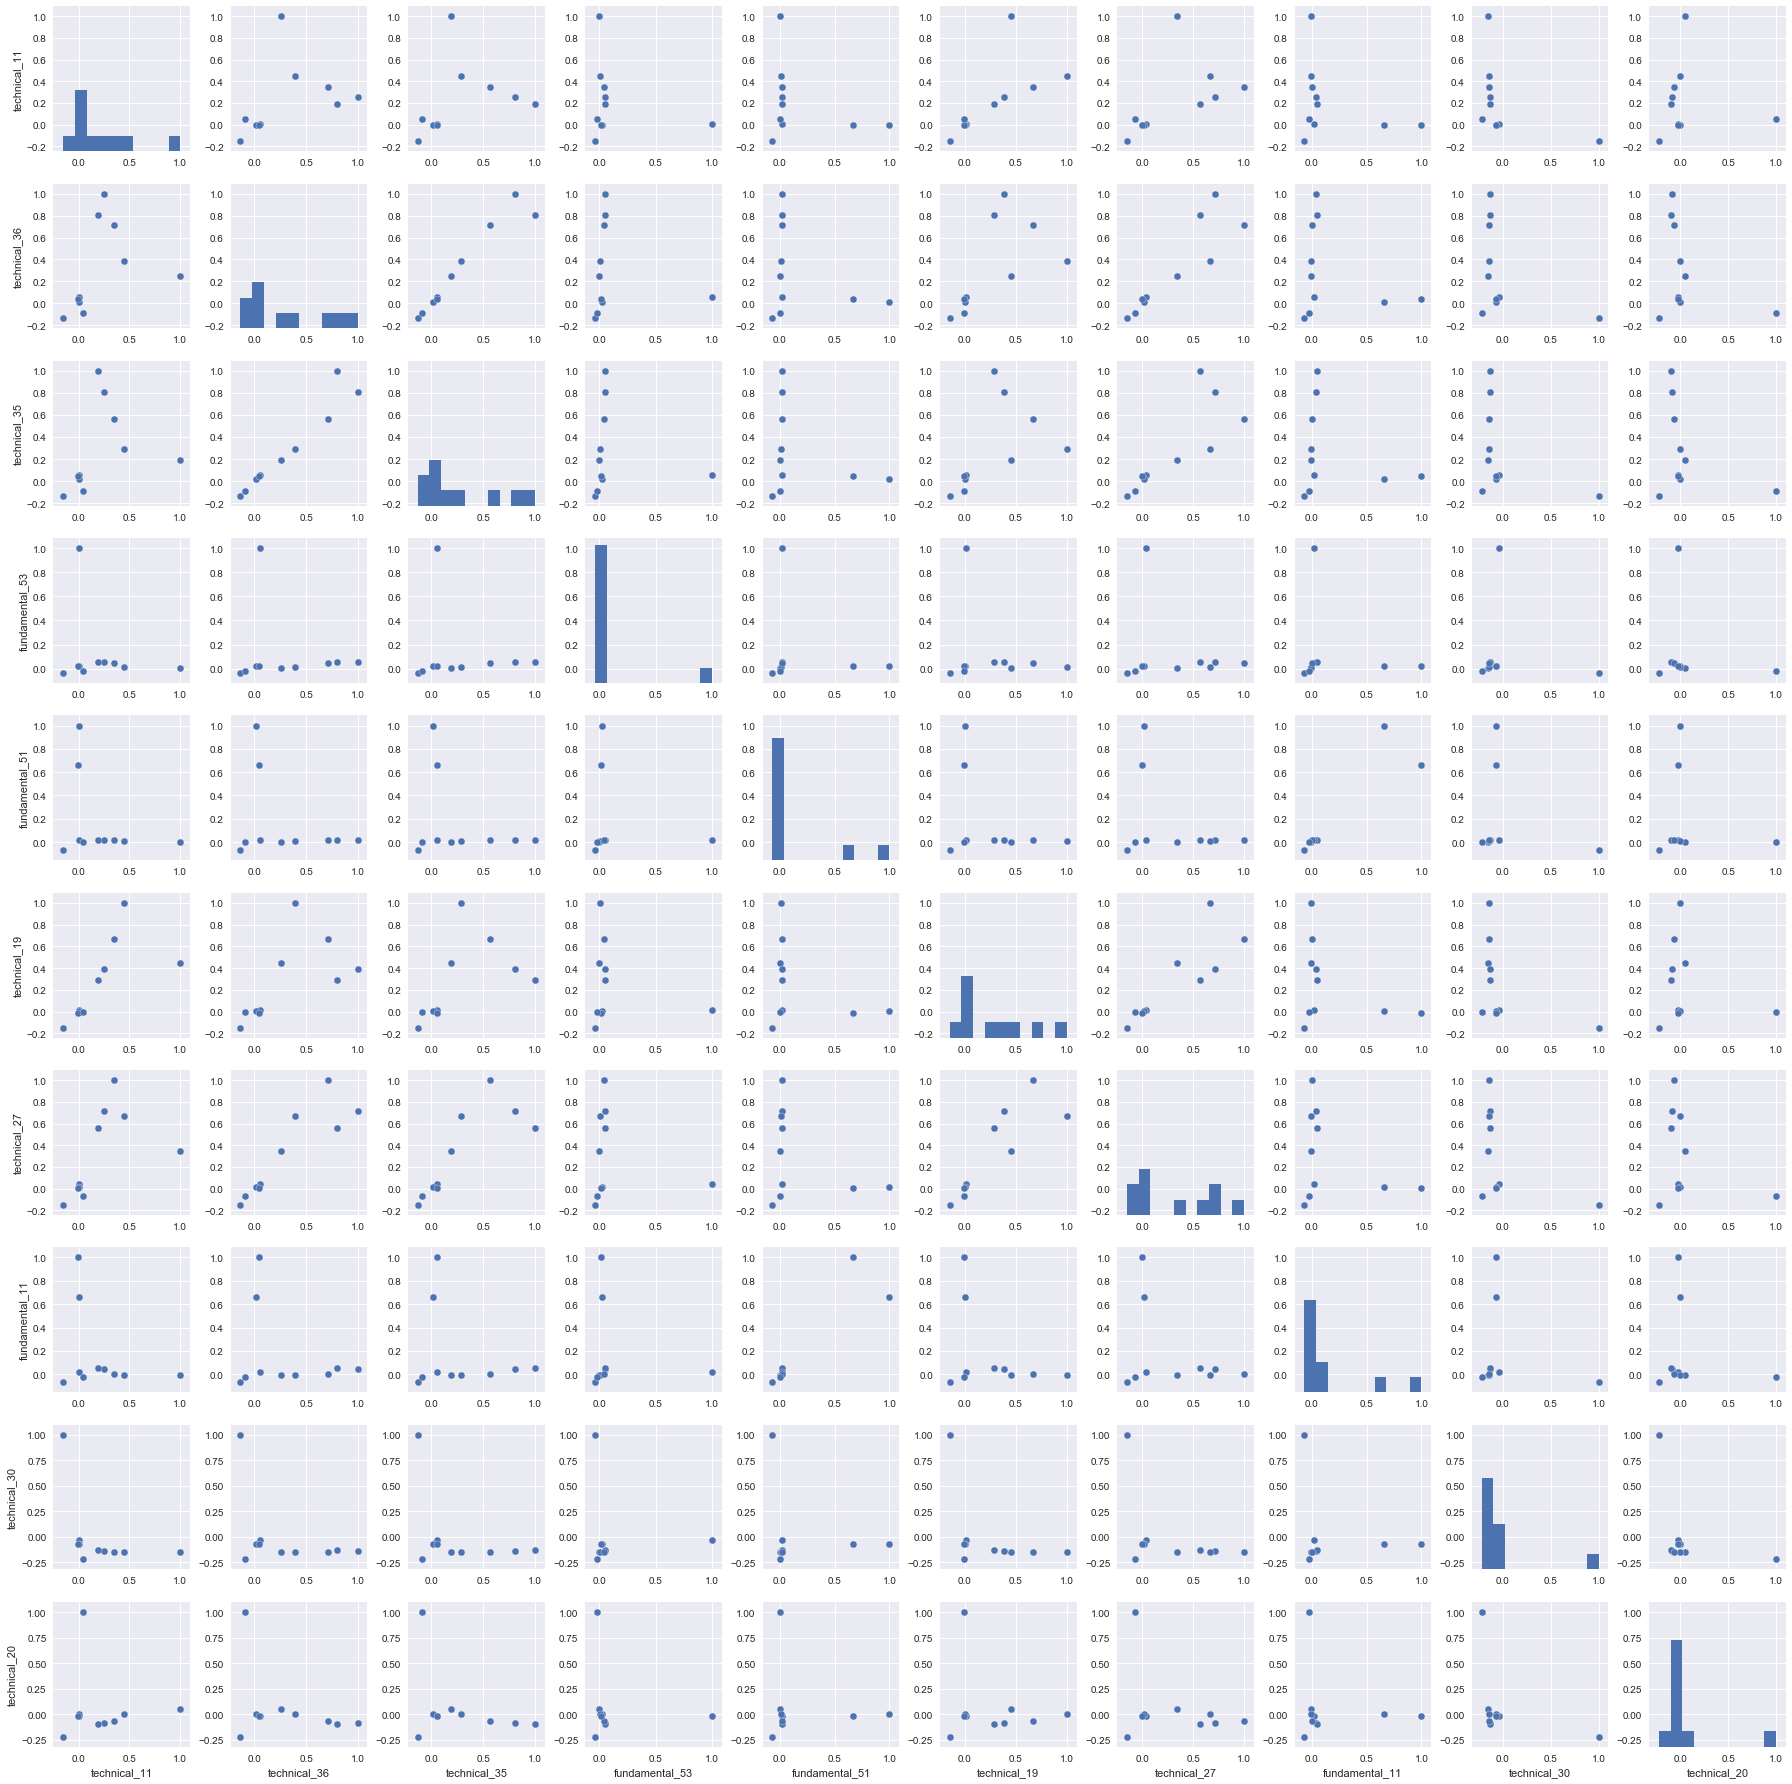

In [28]:
#scatterplot
sns.set()
sns.pairplot(df_high_corr, size = 2.5)
plt.show();